In [ ]:
import pandas as pd
#import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import scipy
import sklearn
import copy
import math
from tabulate import tabulate

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/'
DATASET_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/'
Baseline_DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/Baselines/'
Aggregate_DATA_PATH = '/content/drive/MyDrive/Project/AzureDataset_FunctionCalls/k6csv/RngRemake/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bogos = []
for i in ['nov24_24hours_bogo', 'nov24_24hours_b1b6_f', 'nov24_24hours_a927_f']:
  csvName = i

  csvArray = pd.read_csv(DATASET_PATH+'/Jan17/'+csvName+'.csv', header=None, usecols=[0,1,2,])
  #csvArray = pd.read_csv(DATASET_PATH+'/New/'+csvName+'.csv', header=None, usecols=[0,1,2,])
  bogo = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
  startTime = int(bogo[1].iloc[0:1])
  endTime = int(bogo[1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  min = 5
  max = 99999
  bogo = bogo[(bogo[1] >= startTime+60*(min)) & (bogo[1] < startTime+60*(max))].reset_index(drop=True)
  #bogo[2].plot()
  bogos.append([bogo, csvName])

<ipython-input-4-fd9034863159>:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(bogo[1].iloc[0:1])
<ipython-input-4-fd9034863159>:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(bogo[1].iloc[0:1])
<ipython-input-4-fd9034863159>:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(bogo[1].iloc[0:1])


In [ ]:
bubbles = []
for i in ['nov24_24hours_bubble', 'nov24_24hours_b1b6_f', 'nov24_24hours_a927_f']:
  csvName = i

  csvArray = pd.read_csv(DATASET_PATH+'/Jan17/'+csvName+'.csv', header=None, usecols=[0,1,2,])
  #csvArray = pd.read_csv(DATASET_PATH+'/New/'+csvName+'.csv', header=None, usecols=[0,1,2,])
  bubble = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
  startTime = int(bubble[1].iloc[0:1])
  endTime = int(bubble[1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  min = 5
  max = 99999
  bubble = bubble[(bubble[1] >= startTime+60*(min)) & (bubble[1] < startTime+60*(max))].reset_index(drop=True)
  #bubble[2].plot()
  bubbles.append([bubble, csvName])

<ipython-input-5-fb397df97bbd>:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(bubble[1].iloc[0:1])
<ipython-input-5-fb397df97bbd>:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(bubble[1].iloc[0:1])
<ipython-input-5-fb397df97bbd>:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(bubble[1].iloc[0:1])


In [ ]:
weights = [[256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 325, 326, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 922, 923, 924, 925, 926, 927, 928, 929, 943, 944, 987, 988, 989, 990, 991, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1173, 1174, 1175, 1176, 1177, 1178, 1179], [360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 864, 865, 866, 867, 868, 869, 870, 871], [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 164, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1250, 1251, 1259, 1260, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1434, 1435], [310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 992, 993, 994, 995, 996, 997, 998, 999, 1000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433], [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 230, 231, 232, 233, 234, 235, 236, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1231, 1232, 1233, 1235, 1236, 1237, 1238, 1239, 1248, 1249, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269], [237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1113, 1114, 1115, 1116, 1117, 1140, 1141, 1142, 1143, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1234]]

restart= False

name = '33fe_5_min_ice90_7clust_f'
m=5
warmup = 5
totalTestLength = m+warmup+1

weightsActual = []
weightSum = 0
for weight in weights:
  weightSum += len(weight)
print(weightSum)
total = 0
for weight in weights:
  total += round((len(weight)/weightSum)*(1440/m))
  weightsActual.append(round((len(weight)/weightSum)*(1440/m)))
print(total)
print(weightsActual)

if restart:
  for e in [name]:
    csvName = e

    csvArray = pd.read_csv(DATASET_PATH+'/Jan17/'+csvName+'.csv', header=None, usecols=[0,1,2,])
    #csvArray = pd.read_csv(DATASET_PATH+'/New/'+csvName+'.csv', header=None, usecols=[0,1,2,])
    bogo = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
    startTime = int(bogo[1].iloc[0:1])
    endTime = int(bogo[1].iloc[-1])
    maxTime = round((endTime-startTime)/60)
    cluster = []
    #cluster.append(bogo[(bogo[1] < startTime+60*(warmup))])
    for l in range(len(weights)):
      cluster.append(bogo[(bogo[1] >= startTime+60*(warmup+(l*totalTestLength))) & (bogo[1] < startTime+60*(warmup+m+0.5+(l*totalTestLength)))])
    first = True
    for i in range(len(weightsActual)):
      for l in range(weightsActual[i]):
        if first:
          bogo = cluster[i].reset_index(drop=True)
        else:
          bogo = pd.concat([bogo.reset_index(drop=True), cluster[i].reset_index(drop=True)])
        first = False

    #bogo[2].plot()
    bogos.append([bogo, csvName])

  for e in [name]:
    csvName = e

    csvArray = pd.read_csv(DATASET_PATH+'/Jan17/'+csvName+'.csv', header=None, usecols=[0,1,2,])
    #csvArray = pd.read_csv(DATASET_PATH+'/New/'+csvName+'.csv', header=None, usecols=[0,1,2,])
    bubble = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
    startTime = int(bubble[1].iloc[0:1])
    endTime = int(bubble[1].iloc[-1])
    maxTime = round((endTime-startTime)/60)
    cluster = []
    #cluster.append(bubble[(bubble[1] < startTime+60*(warmup))])
    for l in range(len(weights)):
      cluster.append(bubble[(bubble[1] >= startTime+60*(warmup+(l*totalTestLength))) & (bubble[1] < startTime+60*(warmup+m+0.5+(l*totalTestLength)))])

    for i in range(len(weightsActual)):
      for l in range(weightsActual[i]):
        if first:
          bubble = cluster[i]
        else:
          bubble = pd.concat([bubble.reset_index(drop=True), cluster[i].reset_index(drop=True)])
        first = False

    #bubble[2].plot()
    bubbles.append([bubble, csvName])

1436
288
[35, 34, 41, 58, 25, 36, 59]


In [ ]:
merged = []
num = len(bubbles)
i = 0
while i < num:
  merged.append([pd.concat([bogos[i][0],bubbles[i][0]]), bogos[i][1] + ' ' + bubbles[i][1]])
  i += 1

In [ ]:
# startTime = int(bogo[1].iloc[0:1])
# endTime = int(bogo[1].iloc[-1])
# maxTime = int((endTime-startTime)/60)
# means = []
# nintieth = []
# ninetyFive = []
# ninetyNine = []

# for i in range(maxTime):
#   means.append(bogo[2][(bogo[1] >= startTime+60*(i)) & (bogo[1] < startTime+60*(1+i))].mean())
#   nintieth.append(bogo[2][(bogo[1] >= startTime+60*(i)) & (bogo[1] < startTime+60*(1+i))].quantile(0.9))
#   ninetyFive.append(bogo[2][(bogo[1] >= startTime+60*(i)) & (bogo[1] < startTime+60*(1+i))].quantile(0.95))
#   ninetyNine.append(bogo[2][(bogo[1] >= startTime+60*(i)) & (bogo[1] < startTime+60*(1+i))].quantile(0.5))
# readable = pd.DataFrame(np.array([means,nintieth,ninetyFive,ninetyNine]), index = ['mean', '90', '95','50'])
# print(readable)
# print(readable.loc['mean'].mean())
# print(readable.loc['90'].mean())
# readable.loc['mean'].plot()

In [ ]:
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# from scipy.stats import chi2_contingency
# from scipy.stats import goodness_of_fit
# from scipy.stats import rv_continuous
# for i in range(1,len(bubbles)):
#   bins, binEdges = np.histogram(merged[0][0][2], bins='doane')
#   bins2, binEdges2 = np.histogram(merged[i][0][2],bins=binEdges)
#   bins2 = bins2/len(merged[i][0][2])
#   bins = bins/len(merged[0][0][2])
#   obs = np.array([bins,bins2])
#   print(obs.T)
#   res = scipy.stats.chi2_contingency(obs.T)
#   print([res.statistic, res.pvalue])
#   print(scipy.stats.ttest_rel(bins, bins2))
#   print(scipy.stats.ttest_ind(bins, bins2))
#   print(mean_squared_error(bins, bins2))
#   print(r2_score(bins,bins2))

In [ ]:
# for i in range(1,len(bubbles)):
#   bins, binEdges = np.histogram(merged[i][0][2], bins='doane')
#   bins2, binEdges2 = np.histogram(merged[0][0][2],bins=binEdges)
#   bins2 = bins2/len(merged[0][0][2])
#   bins = bins/len(merged[i][0][2])
#   obs = np.array([bins2,bins])
#   print(obs.T)
#   res = scipy.stats.chi2_contingency(obs.T)
#   print([res.statistic, res.pvalue])

In [ ]:
for i in bogos:
  startTime = int(i[0][1].iloc[0:1])
  endTime = int(i[0][1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  min = 5
  max = 99999
  lister = []
  lister.append(i[0][2].mean())
  lister.append(i[0][2].quantile(0.1))
  lister.append(i[0][2].quantile(0.5))
  lister.append(i[0][2].quantile(0.75))
  lister.append(i[0][2].quantile(0.9))
  lister.append(i[0][2].quantile(0.95))
  lister.append(i[0][2].quantile(0.99))
  lister.append(len(i[0][2]))
  lister.append(len(i[0][2][(i[0][2] > 30)]))
  lister.append(len(i[0][2][(i[0][2] > 50)]))
  lister.append(len(i[0][2][(i[0][2] > 75)]))
  lister.append(len(i[0][2][(i[0][2] > 100)]))
  print(i[1])
  print(lister)

<ipython-input-11-cec1dd12ca45>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])


nov24_24hours_bogo
[30.810961358350653, 26.337927, 27.149217, 29.109207, 38.9964928, 51.50281079999994, 81.71053179999998, 3189577, 700167, 172572, 52061, 3027]


<ipython-input-11-cec1dd12ca45>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])


nov24_24hours_b1b6_f
[27.519711667611837, 26.215683, 26.405067, 26.9975275, 28.575802800000005, 31.650753399999996, 50.99513630000023, 2372783, 199521, 26010, 6276, 181]


<ipython-input-11-cec1dd12ca45>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])


nov24_24hours_a927_f
[28.443920853150335, 26.28811, 26.514286, 27.2394685, 30.7902597, 36.07985539999998, 67.59412570999997, 2729642, 320862, 61083, 17989, 826]


In [ ]:
for i in bubbles:
  startTime = int(i[0][1].iloc[0:1])
  endTime = int(i[0][1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  min = 5
  max = 99999
  lister = []
  lister.append(i[0][2].mean())
  lister.append(i[0][2].quantile(0.1))
  lister.append(i[0][2].quantile(0.5))
  lister.append(i[0][2].quantile(0.75))
  lister.append(i[0][2].quantile(0.9))
  lister.append(i[0][2].quantile(0.95))
  lister.append(i[0][2].quantile(0.99))
  lister.append(len(i[0][2]))
  lister.append(len(i[0][2][(i[0][2] > 30)]))
  lister.append(len(i[0][2][(i[0][2] > 50)]))
  lister.append(len(i[0][2][(i[0][2] > 75)]))
  lister.append(len(i[0][2][(i[0][2] > 100)]))
  print(i[1])
  print(lister)

<ipython-input-12-a9a37cfb2ccc>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])


nov24_24hours_bubble
[21.10258983507783, 18.104106, 18.687827, 19.336976, 24.369079, 36.494378, 68.56591380000002, 4518561, 336416, 113102, 26841, 542]


<ipython-input-12-a9a37cfb2ccc>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])


nov24_24hours_b1b6_f
[18.969948774962806, 17.913762, 18.113584, 18.322385, 19.0545364, 19.58595699999999, 43.27481619999987, 3700917, 87353, 25554, 4687, 3]


<ipython-input-12-a9a37cfb2ccc>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])


nov24_24hours_a927_f
[20.080471134232496, 18.001237, 18.233079, 18.806526, 19.996009500000003, 30.597914799999998, 61.90480765999976, 4224194, 217610, 71385, 16457, 127]


In [ ]:
for i in merged:
  startTime = int(i[0][1].iloc[0:1])
  endTime = int(i[0][1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  min = 5
  max = 99999
  lister = []
  lister.append(i[0][2].mean())
  lister.append(i[0][2].quantile(0.1))
  lister.append(i[0][2].quantile(0.5))
  lister.append(i[0][2].quantile(0.75))
  lister.append(i[0][2].quantile(0.9))
  lister.append(i[0][2].quantile(0.95))
  lister.append(i[0][2].quantile(0.99))
  lister.append(len(i[0][2]))
  lister.append(len(i[0][2][(i[0][2] > 30)]))
  lister.append(len(i[0][2][(i[0][2] > 50)]))
  lister.append(len(i[0][2][(i[0][2] > 75)]))
  lister.append(len(i[0][2][(i[0][2] > 100)]))
  print(i[1])
  print(lister)

<ipython-input-13-999aa2ed5aed>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])


nov24_24hours_bogo nov24_24hours_bubble
[25.11985036130168, 18.159778, 20.1969805, 27.215526, 32.525343899999996, 44.04090844999999, 75.310676, 7708138, 1036583, 285674, 78902, 3569]


<ipython-input-13-999aa2ed5aed>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])


nov24_24hours_b1b6_f nov24_24hours_b1b6_f
[22.310043288308623, 17.951633, 18.5521815, 26.359945, 27.100099200000002, 29.320202099999992, 46.034268139999995, 6073700, 286874, 51564, 10963, 184]


<ipython-input-13-999aa2ed5aed>:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])


nov24_24hours_a927_f nov24_24hours_a927_f
[23.363439501281412, 18.061176, 19.0499495, 26.48101, 28.124485999999997, 33.13685925, 64.2077763, 6953836, 538472, 132468, 34446, 953]


In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
!wget https://github.com/CartoDB/cartodb/raw/master/app/assets/fonts/helvetica.ttf # Download the actual font file
# # Create an instance of FontManager
font_manager = fm.FontManager()

# # Call addfont on the instance
font_manager.addfont(path='helvetica.ttf')
# Path to your .ttf file
font_path = 'helvetica.ttf'

# Add the font to the font manager
fm.fontManager.addfont(font_path)

# Use the font in your plot
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
# Path to your .ttf file
font_path = 'helvetica.ttf'

# Add the font to the font manager
font_prop = fm.FontProperties(fname=font_path)

--2024-09-04 20:17:05--  https://github.com/CartoDB/cartodb/raw/master/app/assets/fonts/helvetica.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CartoDB/cartodb/master/app/assets/fonts/helvetica.ttf [following]
--2024-09-04 20:17:05--  https://raw.githubusercontent.com/CartoDB/cartodb/master/app/assets/fonts/helvetica.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43956 (43K) [application/octet-stream]
Saving to: ‘helvetica.ttf’

helvetica.ttf       100%[===================>]  42.93K  --.-KB/s    in 0.001s  

2024-09-04 20:17:05 (32.4 MB/s) - ‘helvetica.ttf’ saved [43956/43956]



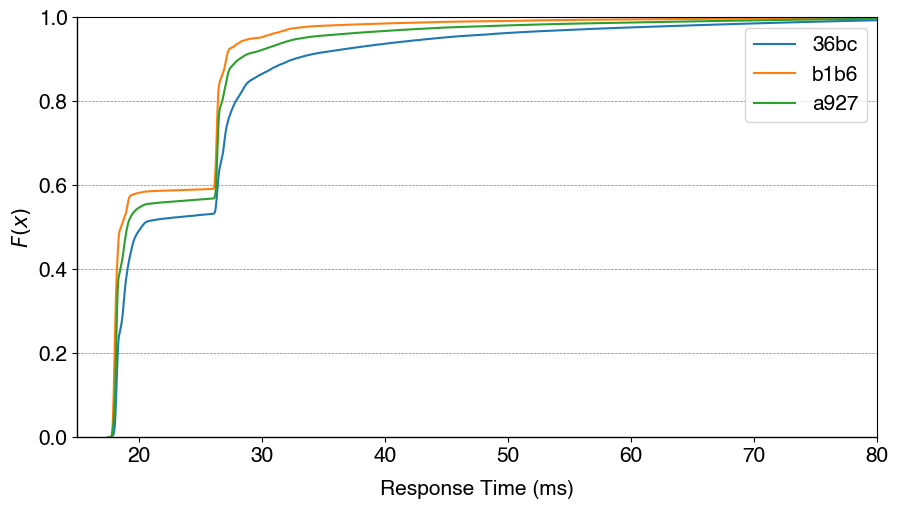

In [ ]:
temp = []
# Plot settings
plt.figure(figsize=(10, 6))

# Define colors
red = "#FF0000"
green = "#049247"
blue = "#0000FF"
skyblue = "#87CEEB"
orange = "#ff9900"
pink = "#ff6699"
purple = "#9933ff"
black = "#000000"
teal = "#48D1CC"


# Set font properties
plt.xticks(fontsize=15, fontname='Helvetica')
plt.yticks(fontsize=15, fontname='Helvetica')

plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='#808080', zorder=0)
#plt.gca().spines['top'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['left'].set_color(black)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['bottom'].set_color(black)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

# Set margins
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.9)

# Set labels
plt.xlabel('Response Time (ms)', fontsize=15, fontname='Helvetica', labelpad=10)
plt.ylabel('$F(x)$', fontsize=15, fontname='Helvetica')
count = 0
for i in merged:
  x = np.sort(i[0][2])


  N = len(i[0][2])


    # get the cdf values of y
  y = np.arange(N) / float(N)
    # plotting
  temp.append(y)

  traceNames = ['36bc','b1b6','a927']
  plt.plot(x, y, label=traceNames[count])
  plt.axis([15, 80, 0, 1])
    #plt.plot((x*-1)+max(x), y, label=data[1]+" inverse")
  plt.legend()
  count +=1
#print(scipy.stats.kstest(temp[0],scipy.stats.norm.cdf))
plt.savefig('CDF_3Trace.pdf')

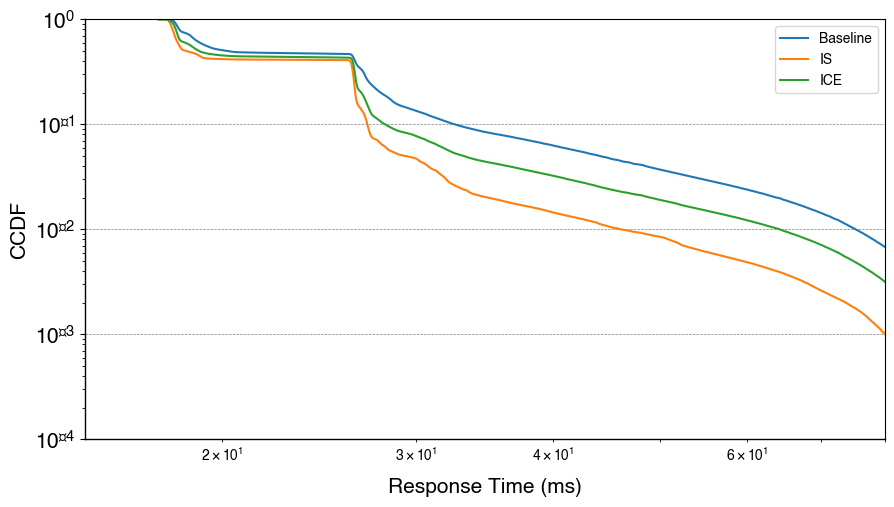

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors
red = "#FF0000"
green = "#049247"
blue = "#0000FF"
skyblue = "#87CEEB"
orange = "#ff9900"
pink = "#ff6699"
purple = "#9933ff"
black = "#000000"
teal = "#48D1CC"

# Plot settings
plt.figure(figsize=(10, 6))

# Set font properties
plt.xticks(fontsize=15, fontname='Helvetica')
plt.yticks(fontsize=15, fontname='Helvetica')

plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='#808080', zorder=0)

plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['left'].set_color(black)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['bottom'].set_color(black)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

# Set margins
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.9)

# Set labels
plt.xlabel('Response Time (ms)', fontsize=15, fontname='Helvetica', labelpad=10)
plt.ylabel('CCDF', fontsize=15, fontname='Helvetica')

count = 0
traceNames = ['Baseline', 'IS', 'ICE']

for i in merged:
    x = np.sort(i[0][2])
    N = len(i[0][2])

    # get the cdf values of y
    y = np.arange(N) / float(N)

    # calculate ccdf
    ccdf = 1 - y

    # plotting on log-log scale
    plt.plot(x, ccdf, label=traceNames[count])
    plt.xscale('log')
    plt.yscale('log')
    plt.axis([15, 80, 1e-4, 1])  # Adjust y-axis limits to better reflect the CCDF on a log scale

    count += 1

plt.legend()
plt.savefig('LogLog_CCDF_3Trace.pdf')


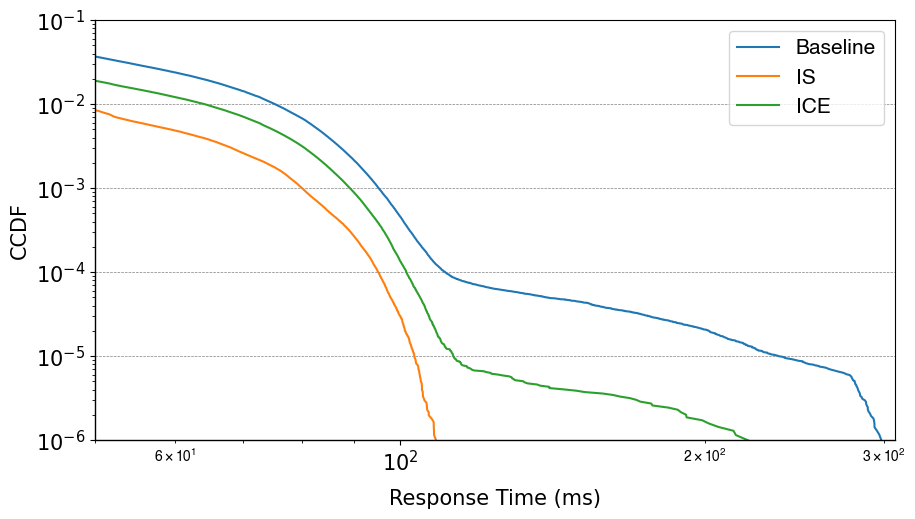

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors
red = "#FF0000"
green = "#049247"
blue = "#0000FF"
skyblue = "#87CEEB"
orange = "#ff9900"
pink = "#ff6699"
purple = "#9933ff"
black = "#000000"
teal = "#48D1CC"

# Plot settings
plt.figure(figsize=(10, 6))

# Set font properties
plt.xticks(fontsize=15, fontname='DejaVu Sans')
plt.yticks(fontsize=15, fontname='DejaVu Sans')
plt.rcParams['font.size'] = 15

plt.grid(True, axis='y', linestyle='--', linewidth=0.5, color='#808080', zorder=0)

plt.gca().spines['left'].set_linewidth(1)
plt.gca().spines['left'].set_color(black)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['bottom'].set_color(black)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

# Set margins
plt.subplots_adjust(top=0.9, bottom=0.2, left=0.1, right=0.9)

# Set labels
plt.xlabel('Response Time (ms)', fontsize=15, fontname='DejaVu Sans', labelpad=10)
plt.ylabel('CCDF', fontsize=15, fontname='DejaVu Sans')

count = 0
traceNames = ['Baseline', 'IS', 'ICE']
longest = []
for i in merged:
    x = np.sort(i[0][2])
    N = len(i[0][2])

    # get the cdf values of y
    y = np.arange(N) / float(N)

    # calculate ccdf
    ccdf = 1 - y

    # plotting on log-log scale
    plt.plot(x, ccdf, label=traceNames[count])
    plt.xscale('log')
    plt.yscale('log')

    # Zoom in on the tail
    #plt.axis([50, np.max(x), 1e-6, 1e-1])  # Adjusted x and y limits to zoom on the tail
    longest.append(np.max(x))
    count += 1
plt.axis([50, np.max(longest), 1e-6, 1e-1])
plt.legend()
plt.savefig('LogLog_CCDF_Tail_Zoom_3Trace.pdf')



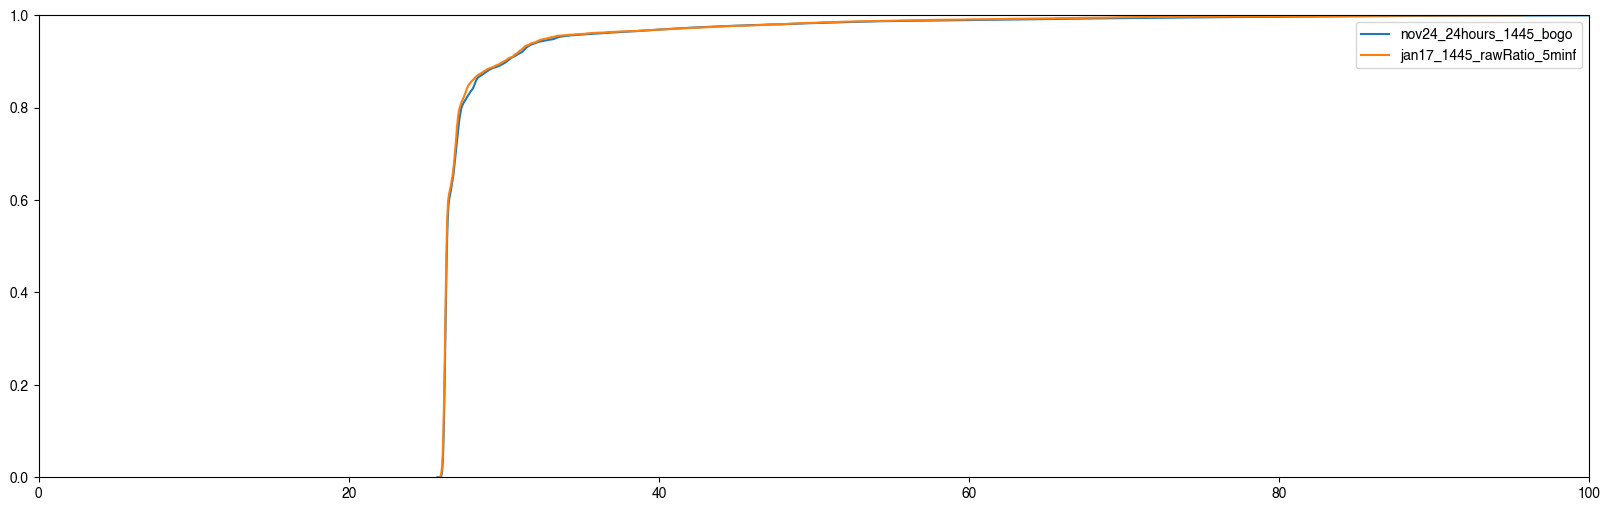

In [ ]:
for i in bogos:
  x = np.sort(i[0][2])


  N = len(i[0][2])


    # get the cdf values of y
  y = np.arange(N) / float(N)
    # plotting

  plt.plot(x, y, label=i[1])
  plt.axis([0, 100, 0, 1])
    #plt.plot((x*-1)+max(x), y, label=data[1]+" inverse")
  plt.legend()

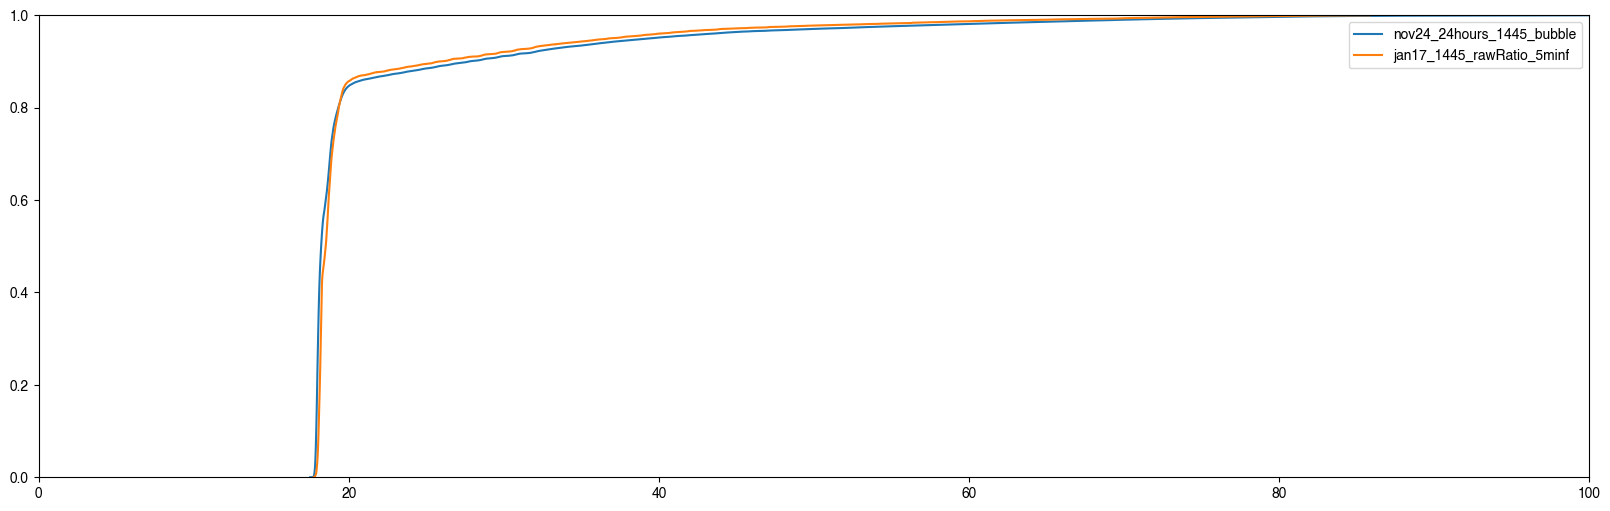

In [ ]:
temp = []
for i in bubbles:
  x = np.sort(i[0][2])


  N = len(i[0][2])


    # get the cdf values of y
  y = np.arange(N) / float(N)
    # plotting
  temp.append(y)
  plt.plot(x, y, label=i[1])
  plt.axis([0, 100, 0, 1])
    #plt.plot((x*-1)+max(x), y, label=data[1]+" inverse")
  plt.legend()
#print(scipy.stats.kstest(temp[0],scipy.stats.uniform.rvs(size=100, random_state=1)))

In [ ]:
percentiles = [0.50,0.75,0.90,0.95,0.99]

for i in merged:
  print(len(i[0][2]))
  ranges = []
  results = []
  data = np.sort(i[0][2])
  for percentile in percentiles:
    percentileValue = np.quantile(data, percentile)

    ranger = 0
    result = 0
    while(result <= 0.95):
      ranger += 0.001

      intervals = np.where((data >= np.quantile(data, percentile)-ranger) & (data <= np.quantile(data, percentile)+ranger))
      n = len(data)
      if np.size(intervals) != 0:
        interval = (intervals[0].min(), intervals[0].max())
        probabilities = []
        for W in interval:
          sigmaSquared = percentile*(1 - percentile)*n
          mew = percentile*n
          result = (W-(mew))/(math.sqrt(sigmaSquared))
          probabilities.append(scipy.stats.norm.cdf(result,0,1))
        result = probabilities[1]-probabilities[0]

    ranges.append(percentileValue - ranger)
    ranges.append(percentileValue + ranger)
  print(ranges)

6498317
[19.459847, 19.473847000000003, 26.347866, 26.349866000000002, 29.405531, 29.463531, 36.847903799999976, 36.951903799999975, 67.25323548, 67.49523547999999]
23464
[19.3614475, 19.5014475, 26.30045625, 26.320456250000003, 28.338320100000004, 29.000320100000003, 34.28738499999995, 36.07538499999995, 59.74519207000011, 64.43919206999982]


In [ ]:
#here!

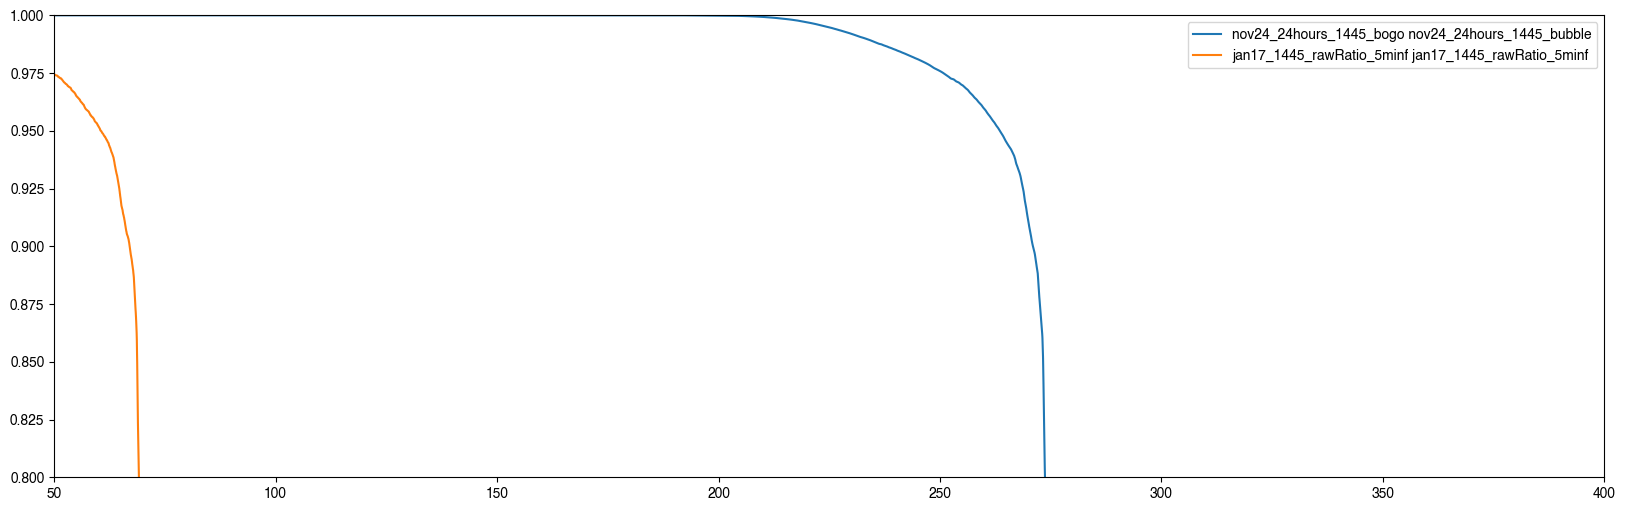

In [ ]:
for i in merged:
  x = np.sort(i[0][2])


  N = len(i[0][2])


    # get the cdf values of y
  y = np.arange(N) / float(N)
    # plotting

  #plt.plot(x, y, label=bubbleArrayClust2[2])
  plt.plot((x*-1)+x.max(), y, label=i[1])
  plt.axis([50, 400, 0.80, 1])
  #plt.xscale("log")
  #plt.yscale("log")
  plt.legend()

In [ ]:
startTime = int(bogo[1].iloc[0:1])
endTime = int(bogo[1].iloc[-1])
maxTime = int((endTime-startTime)/60)
means = []
nintieth = []
ninetyFive = []
ninetyNine = []

for i in range(maxTime):
  means.append(bogo[2][(bogo[1] >= startTime+60*(i)) & (bogo[1] < startTime+60*(1+i))].mean())
  nintieth.append(bogo[2][(bogo[1] >= startTime+60*(i)) & (bogo[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyFive.append(bogo[2][(bogo[1] >= startTime+60*(i)) & (bogo[1] < startTime+60*(1+i))].quantile(0.95))
  ninetyNine.append(bogo[2][(bogo[1] >= startTime+60*(i)) & (bogo[1] < startTime+60*(1+i))].quantile(0.5))
readable = pd.DataFrame(np.array([means,nintieth,ninetyFive,ninetyNine]), index = ['mean', '90', '95','50'])
print(readable)
print(readable.loc['mean'].mean())
print(readable.loc['90'].mean())

means = []
nintieth = []
ninetyFive = []
ninetyNine = []

for i in range(maxTime):
  means.append(bubble[2][(bubble[1] >= startTime+60*(i)) & (bubble[1] < startTime+60*(1+i))].mean())
  nintieth.append(bubble[2][(bubble[1] >= startTime+60*(i)) & (bubble[1] < startTime+60*(1+i))].quantile(0.9))
  ninetyFive.append(bubble[2][(bubble[1] >= startTime+60*(i)) & (bubble[1] < startTime+60*(1+i))].quantile(0.95))
  ninetyNine.append(bubble[2][(bubble[1] >= startTime+60*(i)) & (bubble[1] < startTime+60*(1+i))].quantile(0.5))
readablex = pd.DataFrame(np.array([means,nintieth,ninetyFive,ninetyNine]), index = ['mean', '90', '95','50'])
print(readablex)
print(readablex.loc['mean'].mean())
print(readablex.loc['90'].mean())

              0          1          2          3
mean  28.466911  28.739553  27.198350  27.084013
90    30.875436  31.763425  27.634028  27.757300
95    37.854572  42.735899  31.017214  31.049736
50    26.423320  26.372905  26.302840  26.269613
27.872206667918114
29.50754715
              0          1          2          3
mean  24.743461  21.979858  18.730844  18.579172
90    39.839427  31.813622  18.730882  18.735233
95    53.787500  39.909451  18.908240  18.902999
50    19.205278  18.911946  18.199598  18.131315
21.008333857104038
27.279790875


<ipython-input-19-50e8a9375f74>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(bogo[1].iloc[0:1])


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


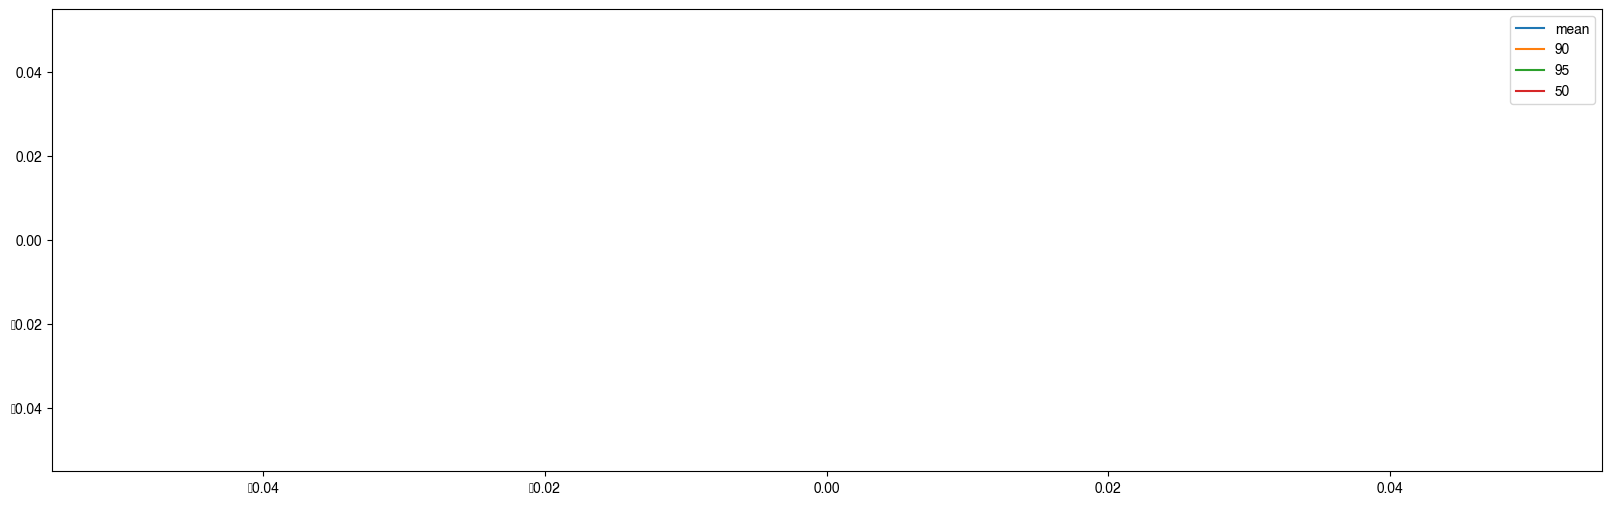

In [ ]:
readable.T.iloc[5:].plot()

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


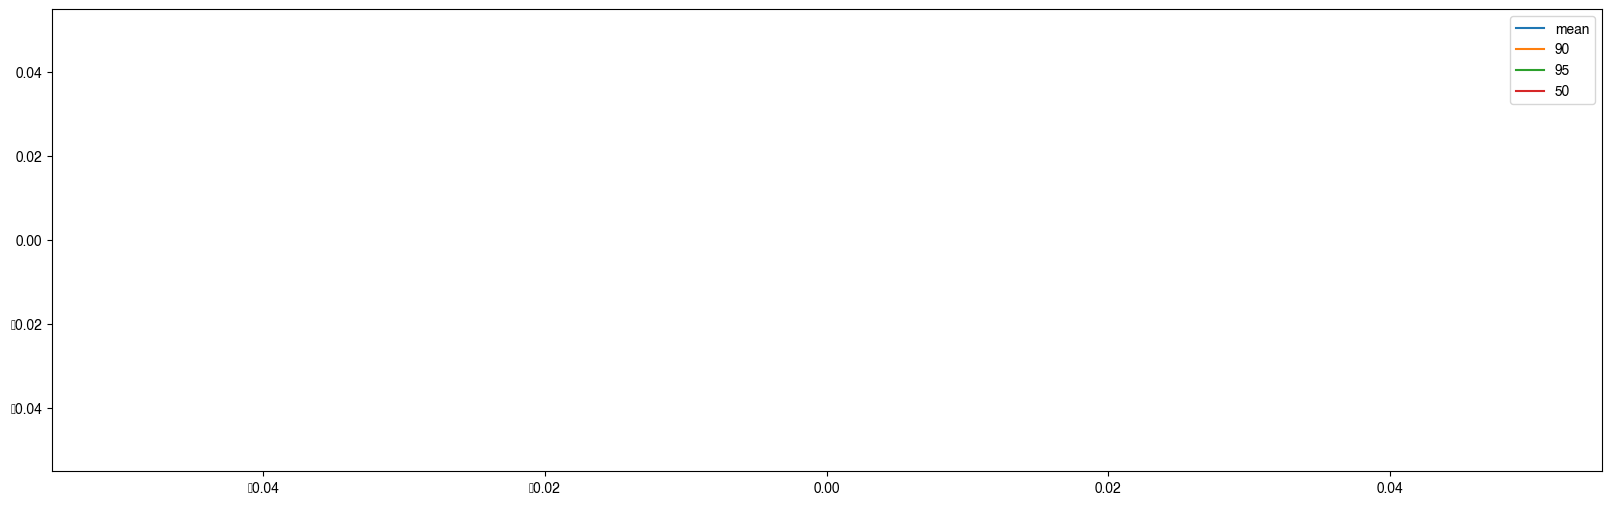

In [ ]:
readablex.T.iloc[5:].plot()

In [ ]:
for i in []:
  csvName = i

  csvArray = pd.read_csv(DATASET_PATH+'/RngRemake/'+csvName+'.csv', header=None, usecols=[0,1,2,])
  #csvArray = pd.read_csv(DATASET_PATH+'/New/'+csvName+'.csv', header=None, usecols=[0,1,2,])
  bogo[2].plot()
  bogo = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
  bogos.append([bogo,i])

In [ ]:
for i in []:
  csvName = i

  csvArray = pd.read_csv(DATASET_PATH+'/RngRemake/'+csvName+'.csv', header=None, usecols=[0,1,2,])
  #csvArray = pd.read_csv(DATASET_PATH+'/New/'+csvName+'.csv', header=None, usecols=[0,1,2,])
  bubble[2].plot()
  bubble = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
  bubbles.append([bubble,i])

In [ ]:
#Confidence intervals for percentiles:
#data = [1,2,3,4,5]
data = [2.10, 2.35, 2.35, 3.10, 3.10, 3.15, 3.90, 3.90, 4.00, 4.80, 5.00, 5.00, 5.15, 5.35, 5.50, 6.00, 6.00, 6.25, 6.45]
#data = [325, 325, 334, 339, 356, 356, 359, 359, 363, 364, 364, 366, 369, 370, 373, 373, 374, 375, 389, 392, 393, 394, 397, 402, 403, 424]
maxOrderStat = 14
minOrderStat = 6
percentile = 0.5
result= 0
for k in range(minOrderStat,maxOrderStat):
  result += scipy.special.binom(len(data), k)*pow(percentile,k)*pow(percentile,len(data)-k)
print(result*100)

93.6431884765625


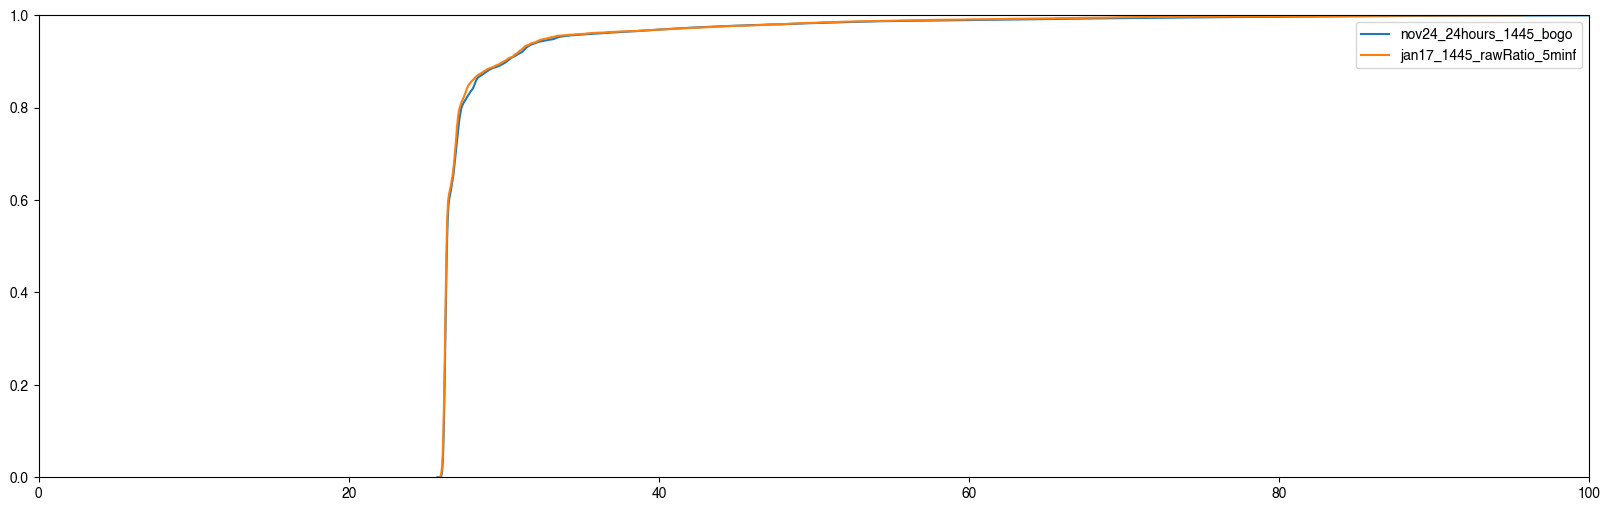

In [ ]:
for i in bogos:
  x = np.sort(i[0][2])


  N = len(i[0][2])


    # get the cdf values of y
  y = np.arange(N) / float(N)
    # plotting

  plt.plot(x, y, label=i[1])
  plt.axis([0, 100, 0, 1])
    #plt.plot((x*-1)+max(x), y, label=data[1]+" inverse")
  plt.legend()

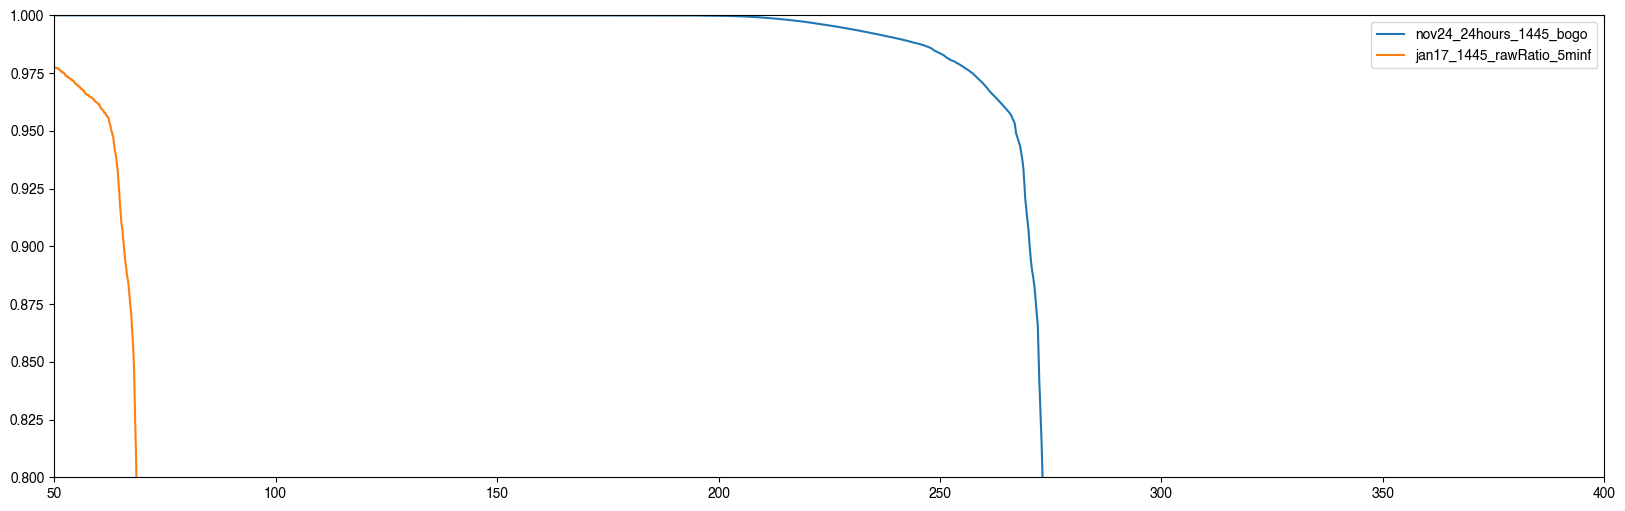

In [ ]:
for i in bogos:
  x = np.sort(i[0][2])


  N = len(i[0][2])


    # get the cdf values of y
  y = np.arange(N) / float(N)
    # plotting

  #plt.plot(x, y, label=bubbleArrayClust2[2])
  plt.plot((x*-1)+x.max(), y, label=i[1])
  plt.axis([50, 400, 0.80, 1])
  #plt.xscale("log")
  #plt.yscale("log")
  plt.legend()

In [ ]:
bubblesBase = []
bogosBase = []
min = 5
max = 99999
for i in ['Bubble', 'Bubble2']:
  csvName = i

  csvArray = pd.read_csv(DATASET_PATH+'/Baselines/'+csvName+'.csv', header=None, usecols=[0,1,2,])

  bubble = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

  startTime = int(bubble[1].iloc[0:1])
  endTime = int(bubble[1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  bubble = bubble[(bubble[1] >= startTime+60*(min)) & (bubble[1] < startTime+60*(max))]

  bubblesBase.append([bubble, csvName])
for i in ['Bogo', 'Bogo2']:
  csvName = i

  csvArray = pd.read_csv(DATASET_PATH+'/Baselines/'+csvName+'.csv', header=None, usecols=[0,1,2,])

  bogo = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

  startTime = int(bogo[1].iloc[0:1])
  endTime = int(bogo[1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  bogo = bogo[(bogo[1] >= startTime+60*(min)) & (bogo[1] < startTime+60*(max))]

  bogosBase.append([bogo, csvName])
print(bogo)

<ipython-input-27-ccd930e2ad10>:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(bubble[1].iloc[0:1])
<ipython-input-27-ccd930e2ad10>:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(bubble[1].iloc[0:1])
<ipython-input-27-ccd930e2ad10>:25: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(bogo[1].iloc[0:1])


                    1          2
10225    1.688170e+09  35.299756
10226    1.688170e+09  35.958761
10227    1.688170e+09  36.266719
10228    1.688170e+09  37.170991
10229    1.688170e+09  37.561320
...               ...        ...
7541449  1.688256e+09   8.821668
7541450  1.688256e+09   8.895999
7541451  1.688256e+09   8.991567
7541452  1.688256e+09  11.150342
7541453  1.688256e+09   8.870353

[7531229 rows x 2 columns]


<ipython-input-27-ccd930e2ad10>:25: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(bogo[1].iloc[0:1])


In [ ]:
windowSize = 15
clusters = 5
warmup = 5

bubbles = []
bogos = []

for i in ['24Hour15min5Clust', '24Hour15min5Clust_2']:
  csvName = i

  csvArray = pd.read_csv(DATASET_PATH+'/Aggregates/'+csvName+'.csv', header=None, usecols=[0,1,2,])

  bubble = csvArray[csvArray[0].eq("get_bubble_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)
  bogo = csvArray[csvArray[0].eq("get_bogo_duration_trend" )].iloc[:,1:].astype(float).reset_index(drop=True)

  allBogos = []
  allBubbles = []

  for c in range(clusters):
    startTimeBogo = int(bogo[1].iloc[0:1])
    endTimeBogo = int(bogo[1].iloc[-1])

    allBogos.append(bogo[(bogo[1] >= startTimeBogo+60*(warmup+(warmup*c+(1*c))+(windowSize*c))) & (bogo[1] < startTimeBogo+60*(warmup+windowSize+(warmup*c+(1*c))+(windowSize*c)))])

    startTimeBubble = int(bubble[1].iloc[0:1])
    endTimeBubble = int(bubble[1].iloc[-1])

    allBubbles.append(bubble[(bubble[1] >= startTimeBubble+60*(warmup+(warmup*c+(1*c))+(windowSize*c))) & (bubble[1] < startTimeBubble+60*(warmup+windowSize+(warmup*c+(1*c))+(windowSize*c)))])

  finalBubble = pd.concat(allBubbles)
  finalBogo = pd.concat(allBogos)

  bubbles.append([finalBubble,i])
  bogos.append([finalBogo, i])

<ipython-input-28-a4106d89c7a8>:11: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  csvArray = pd.read_csv(DATASET_PATH+'/Aggregates/'+csvName+'.csv', header=None, usecols=[0,1,2,])
<ipython-input-28-a4106d89c7a8>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTimeBogo = int(bogo[1].iloc[0:1])
<ipython-input-28-a4106d89c7a8>:25: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTimeBubble = int(bubble[1].iloc[0:1])
<ipython-input-28-a4106d89c7a8>:11: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  csvArray = pd.read_csv(DATASET_PATH+'/Aggregates/'+csvName+'.csv', header=None, usecols=[0,1,2,])
<ipython-input-28-a4106d89c7a8>:20: FutureWarning: Calling int on a single element Serie

In [ ]:
print("bubbles")
for i in bubbles:
  startTime = int(i[0][1].iloc[0:1])
  endTime = int(i[0][1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  min = 0
  max = 99999
  lister = []
  lister.append(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))].mean())
  lister.append(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))].quantile(0.5))
  lister.append(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))].quantile(0.9))
  lister.append(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))].quantile(0.95))
  lister.append(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))].quantile(0.99))
  lister.append(len(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))]))
  lister.append(len(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max)) & (i[0][2] > 30)]))
  lister.append(len(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max)) & (i[0][2] > 50)]))
  lister.append(len(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max)) & (i[0][2] > 75)]))
  lister.append(len(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max)) & (i[0][2] > 100)]))
  print(i[1])
  print(lister)
print("bogos")
for i in bogos:
  startTime = int(i[0][1].iloc[0:1])
  endTime = int(i[0][1].iloc[-1])
  maxTime = round((endTime-startTime)/60)
  min = 5
  max = 99999
  lister = []
  lister.append(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))].mean())
  lister.append(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))].quantile(0.5))
  lister.append(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))].quantile(0.9))
  lister.append(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))].quantile(0.95))
  lister.append(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))].quantile(0.99))
  lister.append(len(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max))]))
  lister.append(len(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max)) & (i[0][2] > 30)]))
  lister.append(len(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max)) & (i[0][2] > 50)]))
  lister.append(len(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max)) & (i[0][2] > 75)]))
  lister.append(len(i[0][2][(i[0][1] >= startTime+60*(min)) & (i[0][1] < startTime+60*(max)) & (i[0][2] > 100)]))
  print(i[1])
  print(lister)

<ipython-input-29-48bdc35aee7f>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])
<ipython-input-29-48bdc35aee7f>:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])
<ipython-input-29-48bdc35aee7f>:23: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])
<ipython-input-29-48bdc35aee7f>:23: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  startTime = int(i[0][1].iloc[0:1])


bubbles
24Hour15min5Clust
[18.35464872834588, 17.254646, 20.68933, 31.382367, 47.458591600000005, 263541, 14511, 2089, 380, 102]
24Hour15min5Clust_2
[19.53394451877727, 18.0914455, 27.504986500000005, 36.841712999999984, 58.61143989999997, 263670, 22439, 4090, 782, 148]
bogos
24Hour15min5Clust
[14.831476531933392, 13.381006, 20.6407704, 28.18730329999999, 47.44911774000011, 346299, 14678, 2869, 423, 57]
24Hour15min5Clust_2
[15.787397912830142, 13.703557, 25.270686199999997, 32.26301819999999, 56.735443519999876, 346473, 21858, 5075, 1046, 43]


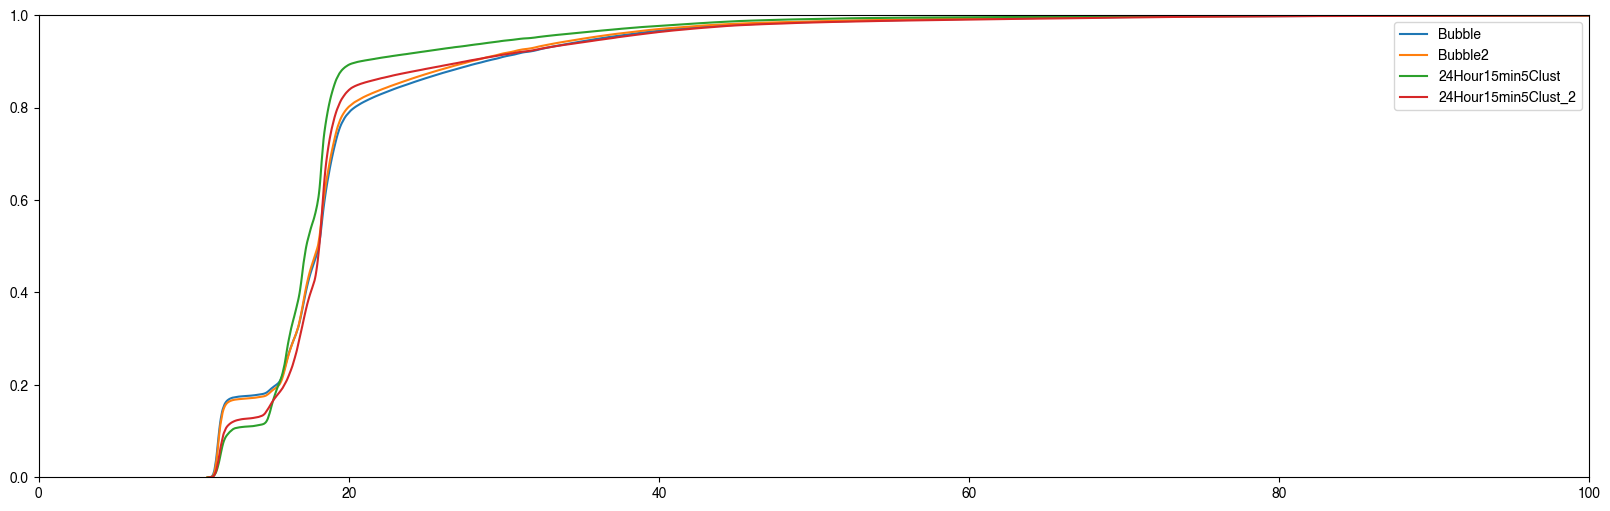

In [ ]:
bubbles = bubblesBase + bubbles
for i in bubbles:
  x = np.sort(i[0][2])


  N = len(i[0][2])


    # get the cdf values of y
  y = np.arange(N) / float(N)
    # plotting

  plt.plot(x, y, label=i[1])
  plt.axis([0, 100, 0, 1])
    #plt.plot((x*-1)+max(x), y, label=data[1]+" inverse")
  plt.legend()

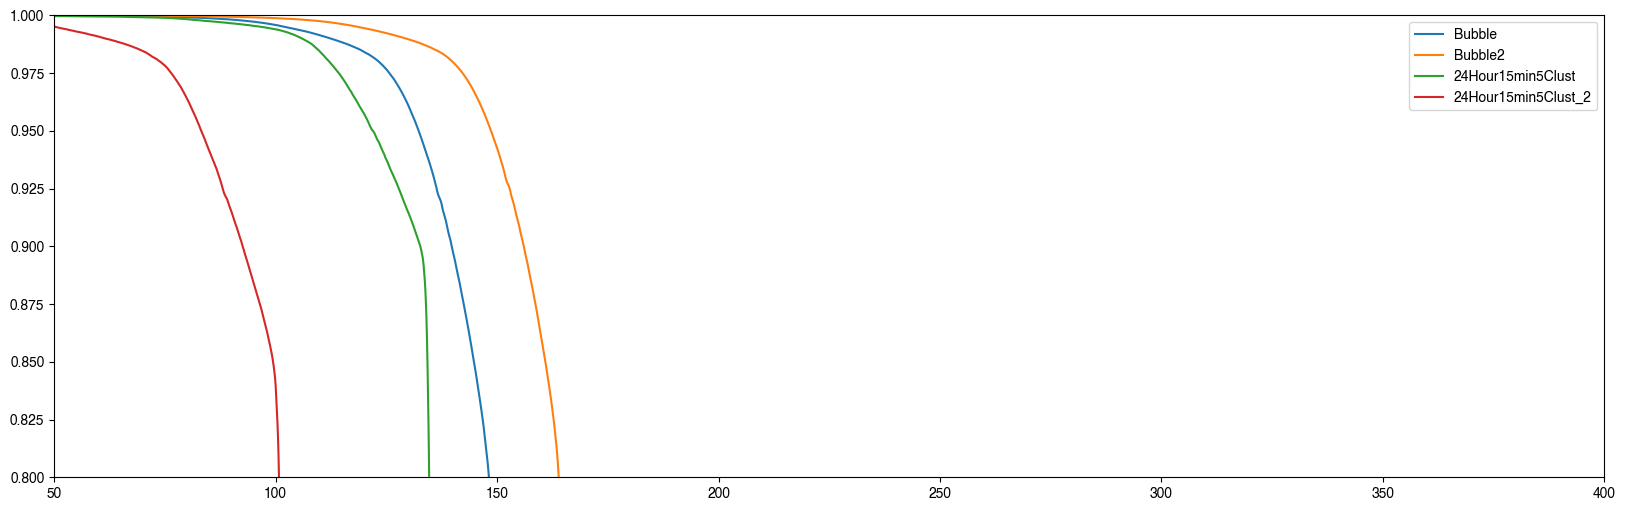

In [ ]:
for i in bubbles:
  x = np.sort(i[0][2])


  N = len(i[0][2])


    # get the cdf values of y
  y = np.arange(N) / float(N)
    # plotting

  #plt.plot(x, y, label=bubbleArrayClust2[2])
  plt.plot((x*-1)+x.max(), y, label=i[1])
  plt.axis([50, 400, 0.80, 1])
  #plt.xscale("log")
  #plt.yscale("log")
  plt.legend()

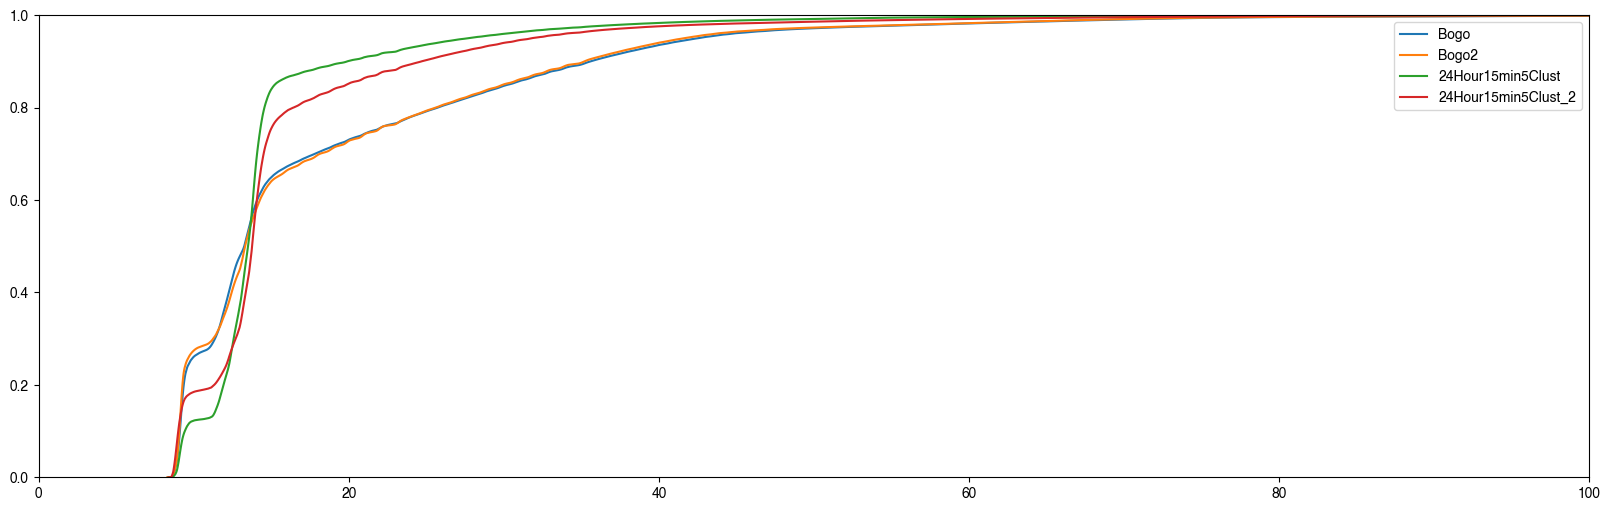

In [ ]:
bogos = bogosBase + bogos
for i in bogos:
  x = np.sort(i[0][2])


  N = len(i[0][2])


    # get the cdf values of y
  y = np.arange(N) / float(N)
    # plotting

  plt.plot(x, y, label=i[1])
  plt.axis([0, 100, 0, 1])
    #plt.plot((x*-1)+max(x), y, label=data[1]+" inverse")
  plt.legend()

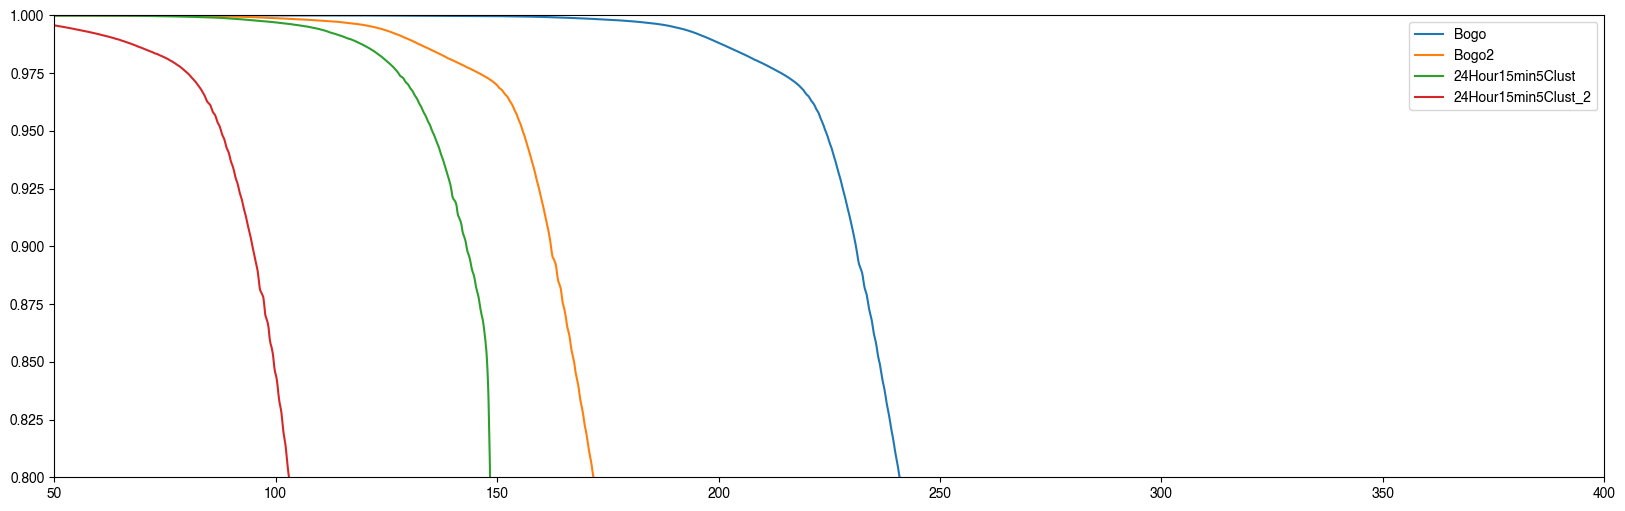

In [ ]:
for i in bogos:
  x = np.sort(i[0][2])


  N = len(i[0][2])


    # get the cdf values of y
  y = np.arange(N) / float(N)
    # plotting

  #plt.plot(x, y, label=bubbleArrayClust2[2])
  plt.plot((x*-1)+x.max(), y, label=i[1])
  plt.axis([50, 400, 0.80, 1])
  #plt.xscale("log")
  #plt.yscale("log")
  plt.legend()